In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
def stack_pred(estimator, X, y, Xt, k=3, method='predict'):
    
    sX = np.zeros((X.shape[0]))
    sXt = np.zeros((Xt.shape[0]))
    if method == 'predict':
        for train_index, test_index in KFold(n_splits = k).split(X, y):
            X_train, X_test = X[train_index,:], X[test_index,:]
            y_train, y_test = y[train_index], y[test_index]
            model = estimator.fit(X_train, y_train)
            sX[test_index] = model.predict(X_test)
            sXt += model.predict(Xt)
            
    if method == 'predict_proba':
        for train_index, test_index in KFold(n_splits = k).split(X, y):
            X_train, X_test = X[train_index,:], X[test_index,:]
            y_train, y_test = y[train_index], y[test_index]
            model = estimator.fit(X_train, y_train)
            sX[test_index] = model.predict_proba(X_test)[:,1]
            sXt += model.predict_proba(Xt)[:,1]
        
    return sX, sXt/k

### Применение

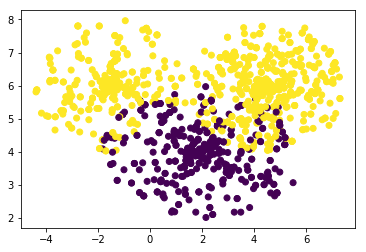

In [3]:
data = pd.read_csv('dataset1.csv', sep = '\t')
#plt.figure()
plt.scatter(data.F1, data.F2, c=data['T'])
plt.show()

LR score = 0.938145750103


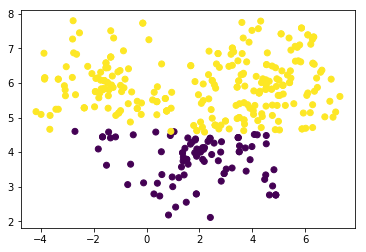

RF score = 0.979525416724


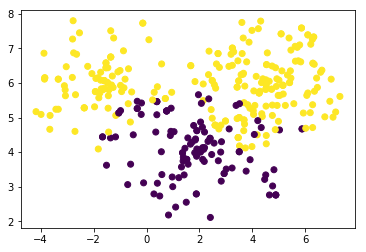

KNC score = 0.977149056344


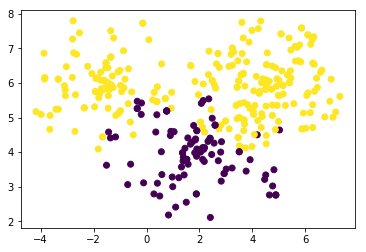

In [4]:
data = np.array(data)

def metric(y_test, res):
    return roc_auc_score(y_test, res)

X_train, X_test, y_train, y_test = train_test_split(data[:,:-1], data[:,-1], train_size = 0.7, random_state = 17)

lr = LogisticRegression(random_state = 3).fit(X_train, y_train)
print('LR score = ' + str(metric(y_test, lr.predict_proba(X_test)[:,1])))
plt.scatter(X_test[:,0], X_test[:,1], c=lr.predict(X_test))
plt.show()

rf = RandomForestClassifier(random_state = 7).fit(X_train, y_train)
print('RF score = ' + str(metric(y_test, rf.predict_proba(X_test)[:,1])))
plt.scatter(X_test[:,0], X_test[:,1], c=rf.predict(X_test))
plt.show()

knc = KNeighborsClassifier().fit(X_train, y_train)
print('KNC score = ' + str(metric(y_test, knc.predict_proba(X_test)[:,1])))
plt.scatter(X_test[:,0], X_test[:,1], c=knc.predict(X_test))
plt.show()

Stacking LR score = 0.985638517702


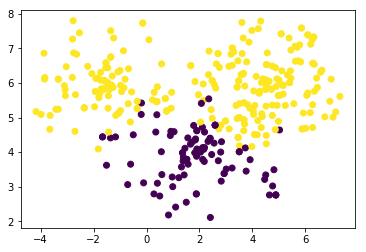

In [5]:
def metric(y_test, res):
    return roc_auc_score(y_test, res)

meta_train = np.zeros((X_train.shape[0],3))
meta_test = np.zeros((X_test.shape[0],3))
meta_train[:,0], meta_test[:,0] = stack_pred(lr, X_train, y_train, X_test, method = 'predict_proba')
meta_train[:,1], meta_test[:,1] = stack_pred(rf, X_train, y_train, X_test, method = 'predict_proba')
meta_train[:,2], meta_test[:,2] = stack_pred(knc, X_train, y_train, X_test, method = 'predict_proba')

meta_alg_1 = LogisticRegression(random_state = 17).fit(meta_train, y_train)
print('Stacking LR score = ' + str(metric(y_test, meta_alg_1.predict_proba(meta_test)[:,1])))
plt.scatter(X_test[:,0], X_test[:,1], c=meta_alg_1.predict(meta_test))
plt.show()